<b>1. Introduction</b>
<h5>This project aims to analyze the Zomato dataset to derive meaningful insights and trends that can help improve business decisions and user experience.</h5>

<b>2. Data Loading and Exploration</b>

In [4]:
import pandas as pd
import numpy as np

file_path = 'zomato.csv' # Loading dataset
zomato_df = pd.read_csv(file_path)

zomato_df.head() # Displaying the first few rows

zomato_df.info() # Displaying the structure and summary of the dataset
zomato_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
count,7105.000000,7105.000000,7105,7105,7037.000000,7105.000000,7048.000000,7105,7105,7105,7105,7105
unique,NaN,NaN,7105,81,NaN,NaN,NaN,2,2,2175,30,90
top,NaN,NaN,#FeelTheROLL,Quick Bites,NaN,NaN,NaN,Yes,No,"North Indian, Chinese","Byresandra,Tavarekere,Madiwala",Whitefield
freq,NaN,NaN,1,2840,NaN,NaN,NaN,3727,6361,421,798,459
mean,3552.000000,3552.000000,NaN,NaN,3.514253,188.921042,540.286464,NaN,NaN,NaN,NaN,NaN
std,2051.181164,2051.181164,NaN,NaN,0.463249,592.171049,462.902305,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,1.800000,1.000000,40.000000,NaN,NaN,NaN,NaN,NaN
25%,1776.000000,1776.000000,NaN,NaN,3.200000,16.000000,300.000000,NaN,NaN,NaN,NaN,NaN
50%,3552.000000,3552.000000,NaN,NaN,3.500000,40.000000,400.000000,NaN,NaN,NaN,NaN,NaN
75%,5328.000000,5328.000000,NaN,NaN,3.800000,128.000000,600.000000,NaN,NaN,NaN,NaN,NaN


<b>3. Data Cleaning</b>

In [5]:
zomato_df.isnull().sum() # Checking for missing values

zomato_df['rate (out of 5)'] = zomato_df['rate (out of 5)'].fillna(zomato_df['rate (out of 5)'].mode()[0]) # Filling missing values in 'rate' with the mode.

avg_cost = zomato_df['avg cost (two people)'].mean()
zomato_df['avg cost (two people)'].fillna(avg_cost, inplace=True) # Filling missing values in 'avg cost' with the mode.

zomato_df = zomato_df.drop_duplicates() # Removing duplicates

zomato_df['rate (out of 5)'] = zomato_df['rate (out of 5)'].apply(lambda x: str(x).split('/')[0]).astype(float) # Convert rate to a numeric value (considering it might have values like '4.1/5')

zomato_df.isnull().sum() # Verifying data cleaning steps



C:\Users\praja\AppData\Local\Temp\ipykernel_9068\3355792049.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomato_df['avg cost (two people)'].fillna(avg_cost, inplace=True) # Filling missing values in 'avg cost' with the mode.


Unnamed: 0.1             0
Unnamed: 0               0
restaurant name          0
restaurant type          0
rate (out of 5)          0
num of ratings           0
avg cost (two people)    0
online_order             0
table booking            0
cuisines type            0
area                     0
local address            0
dtype: int64

<b>4. Descriptive Statistics and Initial Insights</b>

In [6]:
print("Restaurant names:\n",zomato_df['restaurant name'].value_counts().head()
)
print("\nLocation:\n ",zomato_df['area'].value_counts().head()
)
print("\nCuisines:\n",zomato_df['cuisines type'].value_counts().head()
)
# Calculating descriptive statistics for numeric columns
zomato_df[['rate (out of 5)', 'num of ratings', 'avg cost (two people)']].head()

Restaurant names:
 restaurant name
#FeelTheROLL     1
Pizza Palace     1
Platter          1
Plated           1
Plantain Leaf    1
Name: count, dtype: int64

Location:
  area
Byresandra,Tavarekere,Madiwala    798
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      464
Indiranagar                       455
Name: count, dtype: int64

Cuisines:
 cuisines type
North Indian, Chinese                  421
North Indian                           420
South Indian                           348
Fast Food                              140
South Indian, North Indian, Chinese    128
Name: count, dtype: int64


,rate (out of 5),num of ratings,avg cost (two people)
0,3.4,7,200.0
1,3.9,48,400.0
2,3.7,37,400.0
3,2.7,135,550.0
4,2.8,40,700.0


<b>5. Data Visualization</b>

In [7]:
import matplotlib.pylab as plt
import seaborn as sns

# Style for plots 
sns.set_style("whitegrid")

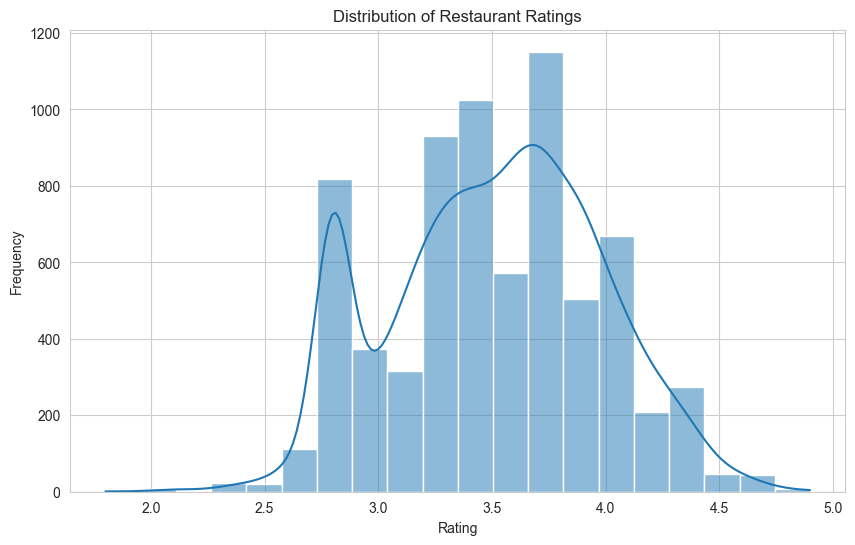

In [8]:
# Distributing Ratings
plt.figure(figsize=(10,6))
sns.histplot(zomato_df['rate (out of 5)'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\praja\AppData\Local\Temp\ipykernel_9068\1313291257.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')


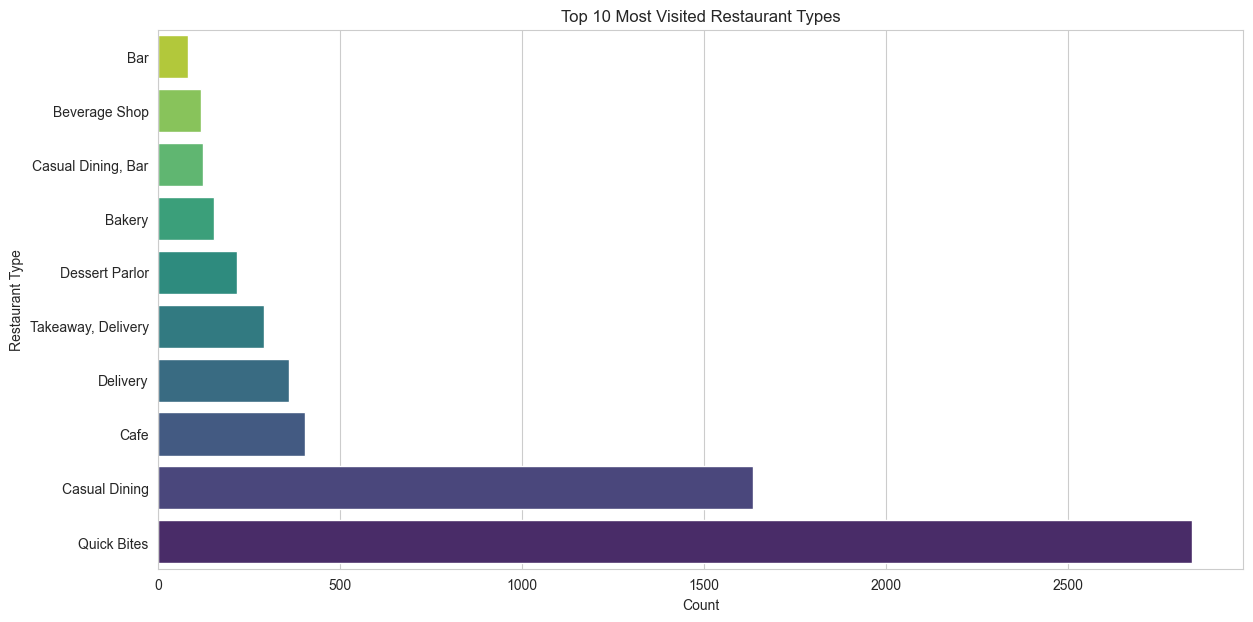

In [26]:
top_restaurants = zomato_df['restaurant type'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')
plt.title('Top 10 Most Visited Restaurant Types')  # Adjusted title
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.gca().invert_yaxis()  # Invert y-axis to display most frequent type at the top
plt.show()

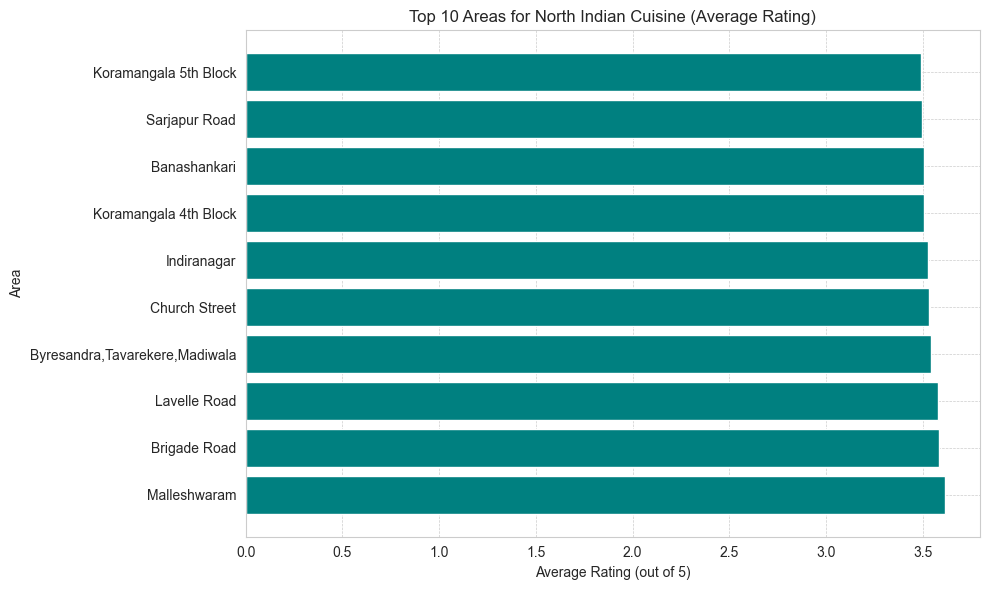

In [41]:
# Filter for North Indian cuisine
df_north_indian = zomato_df[zomato_df['cuisines type'].str.contains("North Indian")]

# Group by area and sort by average rating (descending)
grouped_by_area = (
    df_north_indian.groupby("area")
    .agg({"restaurant name": "count", "rate (out of 5)": "mean"})
    .sort_values(by="rate (out of 5)", ascending=False)
    .reset_index()
    .head(10)  # Select top 10 areas
)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(areas, average_ratings, color='teal')  # Adjust color if needed

# Add labels and title
plt.xlabel('Average Rating (out of 5)')
plt.ylabel('Area')
plt.title('Top 10 Areas for North Indian Cuisine (Average Rating)')

# Customize the plot (gridlines, etc.)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

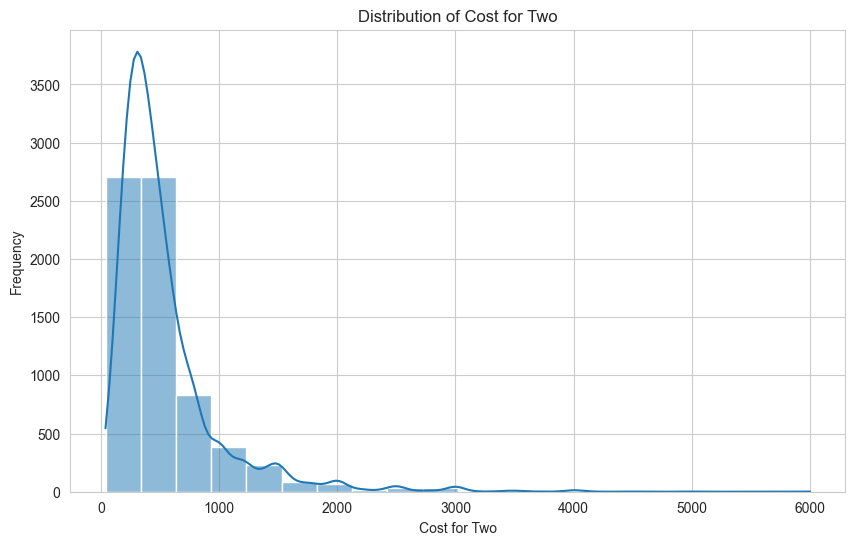

In [42]:
# Distribution of cost for two
plt.figure(figsize=(10,6))
sns.histplot(zomato_df['avg cost (two people)'], bins=20, kde=True)
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Frequency')
plt.show()

C:\Users\praja\AppData\Local\Temp\ipykernel_9068\932784934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_restaurants_votes, x='num of ratings', y='restaurant name', palette='coolwarm')


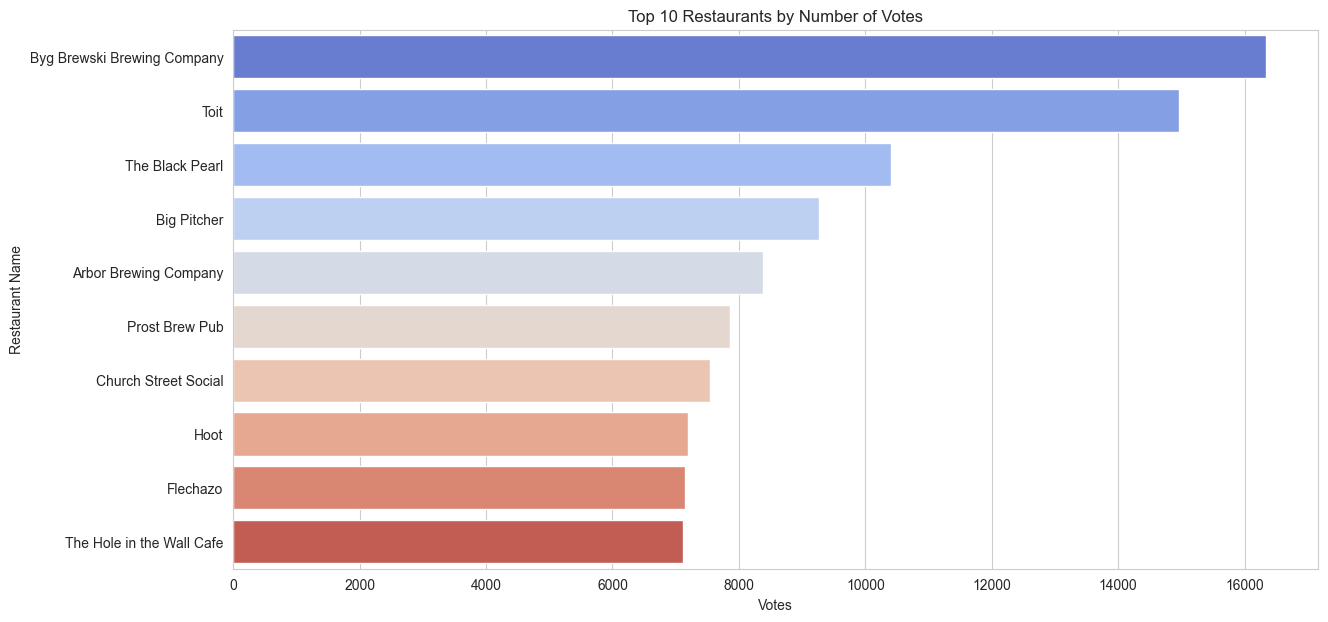

In [48]:
# Top 10 restaurants by number of votes
top_restaurants_votes = zomato_df.nlargest(10, 'num of ratings')[['restaurant name', 'num of ratings', 'rate (out of 5)']]
plt.figure(figsize=(14,7))
sns.barplot(data=top_restaurants_votes, x='num of ratings', y='restaurant name', palette='coolwarm')
plt.title('Top 10 Restaurants by Number of Votes')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.show()

C:\Users\praja\AppData\Local\Temp\ipykernel_9068\3020722725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations, y=top_locations.index, palette='magma')


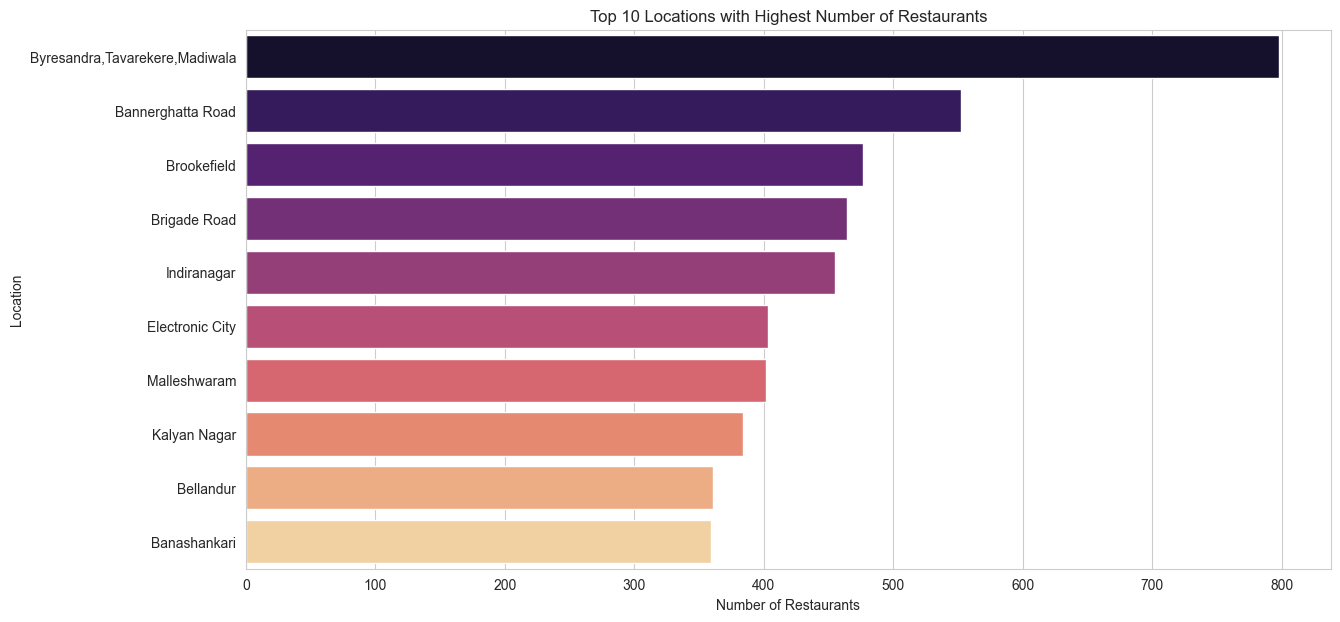

In [50]:
# Top 10 locations with the highest number of restaurants
top_locations = zomato_df['area'].value_counts().nlargest(10)
plt.figure(figsize=(14,7))
sns.barplot(x=top_locations, y=top_locations.index, palette='magma')
plt.title('Top 10 Locations with Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

C:\Users\praja\AppData\Local\Temp\ipykernel_9068\1669121006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_locations, y=avg_rating_locations.index, palette='magma')


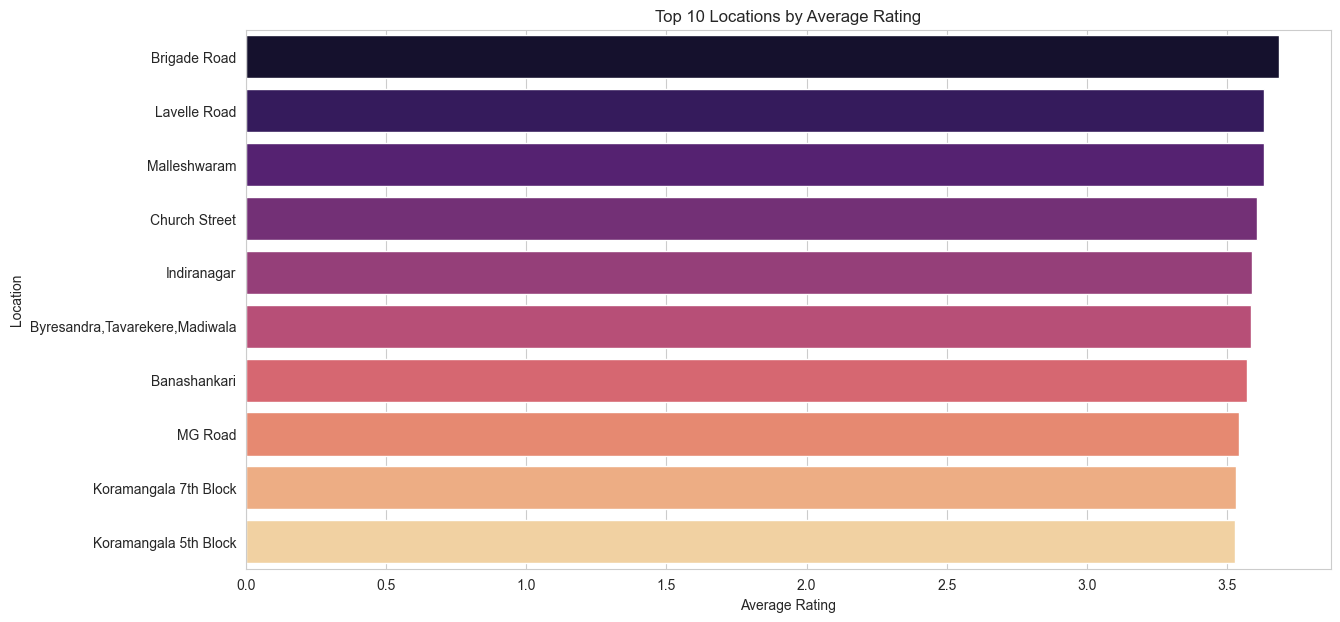

In [51]:
# Average rating of top 10 locations
avg_rating_locations = zomato_df.groupby('area')['rate (out of 5)'].mean().nlargest(10)
plt.figure(figsize=(14,7))
sns.barplot(x=avg_rating_locations, y=avg_rating_locations.index, palette='magma')
plt.title('Top 10 Locations by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()

C:\Users\praja\AppData\Local\Temp\ipykernel_9068\3709582992.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='plasma')


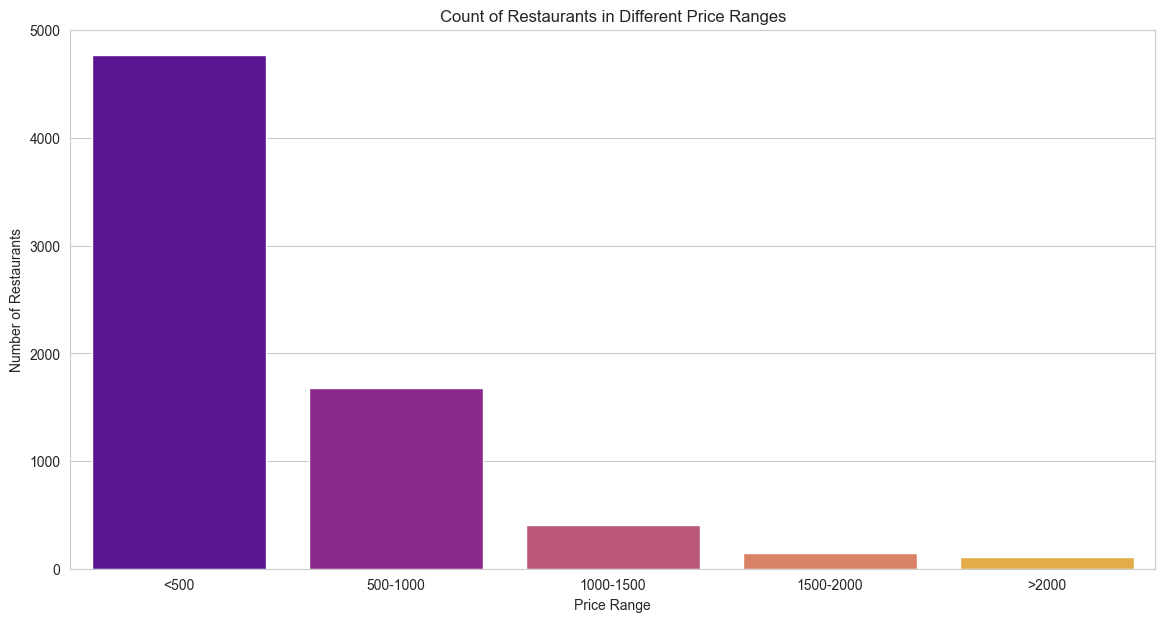

In [52]:
# Price Range Analysis

# Categorizing cost for two into price ranges
price_bins = [0, 500, 1000, 1500, 2000, np.inf]
price_labels = ['<500', '500-1000', '1000-1500', '1500-2000', '>2000']
zomato_df['price_range'] = pd.cut(zomato_df['avg cost (two people)'], bins=price_bins, labels=price_labels)

# Count of restaurants in each price range
price_range_counts = zomato_df['price_range'].value_counts().sort_index()
plt.figure(figsize=(14,7))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='plasma')
plt.title('Count of Restaurants in Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

<b>6. Advanced Analysis</b>

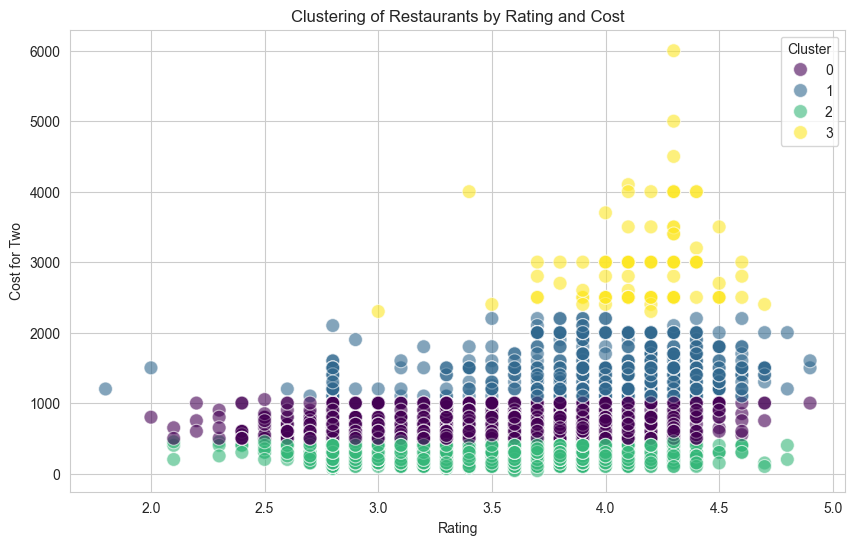

In [43]:
### 6.1 Clustering Restaurants by Rating and Cost
from sklearn.cluster import KMeans

X = zomato_df[['rate (out of 5)', 'avg cost (two people)']].dropna()

Kmeans = KMeans(n_clusters=4)
Kmeans.fit(X)
X['cluster'] = Kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=X, x='rate (out of 5)', y='avg cost (two people)', hue='cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Clustering of Restaurants by Rating and Cost')
plt.xlabel('Rating')
plt.ylabel('Cost for Two')
plt.legend(title='Cluster')
plt.show()

In [45]:
# Saving the cleaned and processed dataset for further use
zomato_df.to_csv('zomato.csv', index=False)
